In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## **Reading the CSVs**

In [4]:
books_df = pd.read_csv('books.csv', sep=';', encoding='latin-1', low_memory=False, on_bad_lines='skip', quoting=1)

rating_df = pd.read_csv('ratings.csv', sep=';',
                        encoding='latin1', on_bad_lines='skip')

users_df = pd.read_csv('users.csv', sep=';',
                       encoding='latin1', on_bad_lines='skip')

## **EDA of Books.csv**

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
print(f"Books: {books_df.shape}")

Books: (271360, 8)


In [7]:
print(f"Books: {books_df.dtypes}\n")

Books: ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object



###  **Comment: Data type of Year-Of-Publication May Need to be changed**

In [8]:
print(f"Books: {books_df.isnull().sum()}\n")

Books: ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64



### **Comment: Hardly any missing values, so these rows can be dropped**

In [11]:
# Basic statistics
print(f"Total unique books: {books_df['ISBN'].nunique()}")

Total unique books: 271353


In [7]:
# Check for Duplicate
duplicates = books_df.duplicated(subset=['ISBN']).sum()
print(f"Duplicate ISBNs: {duplicates}")

Duplicate ISBNs: 0


In [8]:
# Check for Duplicate
duplicate_books = books_df[books_df['Book-Title'].duplicated(keep=False)][['Book-Title']].sort_values(by='Book-Title')
print("\nSome duplicate book titles:")
print(duplicate_books.head(10))


Some duplicate book titles:
                                               Book-Title
75637                           !%@ (A Nutshell handbook)
156341                          !%@ (A Nutshell handbook)
140618  'A Hell of a Place to Lose a Cow': An American...
158204  'A Hell of a Place to Lose a Cow': An American...
10438                                        'Salem's Lot
94187                                        'Salem's Lot
22024                                        'Salem's Lot
249713                                  ...And Now Miguel
105639                                  ...And Now Miguel
269366                  1,003 Great Things About Teachers


### **Comment: No duplicates book ids but there are some duplicate Book Titles that we need to remove**

In [13]:
from datetime import datetime
# Publication year analysis
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
    
print(f"\nPublication Year Statistics:")
print(f"Min year: {books_df['Year-Of-Publication'].min()}")
print(f"Max year: {books_df['Year-Of-Publication'].max()}")



Publication Year Statistics:
Min year: 0
Max year: 2050


<Axes: >

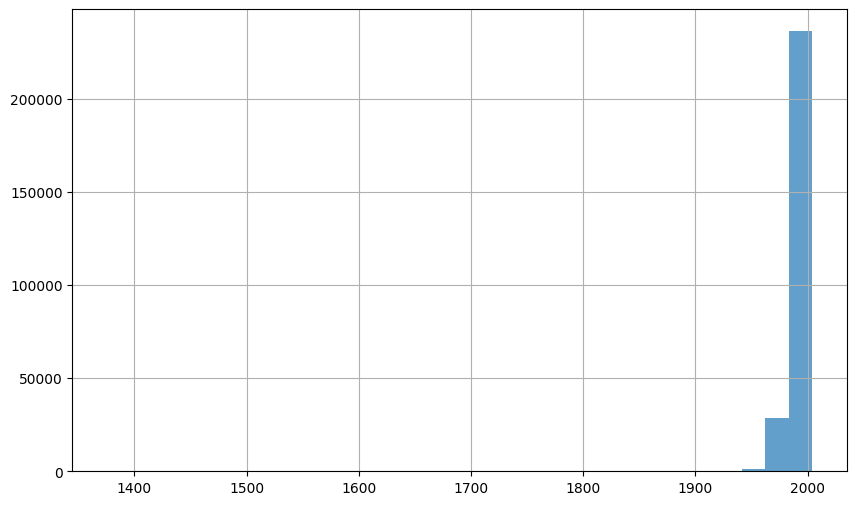

In [45]:
valid_years = books_df['Year-Of-Publication'].dropna()
valid_years = valid_years[(valid_years > 0) & (valid_years <= 2004)]

plt.figure(figsize=(10,6))
valid_years.hist(bins=30, alpha=0.7)

In [22]:
 books_df['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    17626
1999    17430
2001    17358
2000    17232
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: count, Length: 116, dtype: int64

<Axes: >

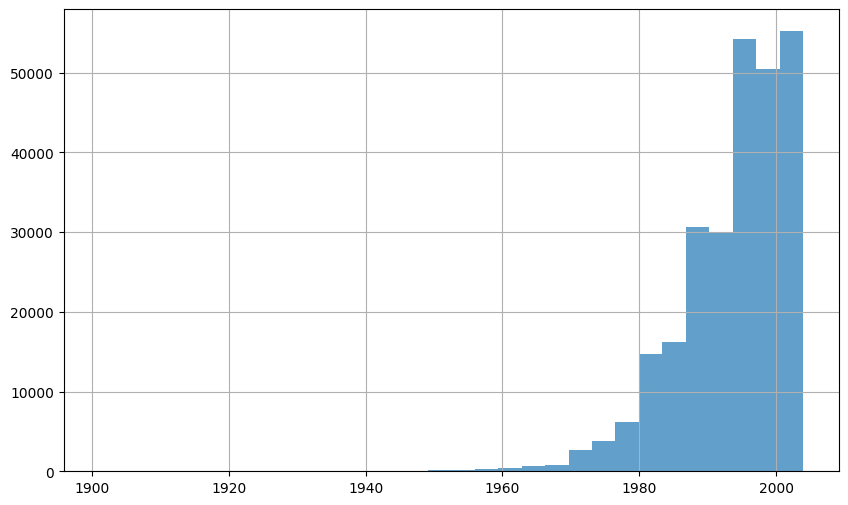

In [46]:
valid_years = books_df['Year-Of-Publication'].dropna()
valid_years = valid_years[(valid_years > 1900) & (valid_years <= 2004)]

plt.figure(figsize=(10,6))
valid_years.hist(bins=30, alpha=0.7)

### **Comment: Books that are having any future published dates > 2004 should be removed as the data was compiled in 2004**

In [29]:
# Top authors
print(f"\nTop 10 Most Prolific Authors:")
top_authors = books_df['Book-Author'].value_counts().head(10)
for author, count in top_authors.items():
    print(f"  {author}: {count} books")


Top 10 Most Prolific Authors:
  Agatha Christie: 632 books
  William Shakespeare: 567 books
  Stephen King: 524 books
  Ann M. Martin: 423 books
  Carolyn Keene: 373 books
  Francine Pascal: 372 books
  Isaac Asimov: 330 books
  Nora Roberts: 315 books
  Barbara Cartland: 307 books
  Charles Dickens: 302 books


In [30]:
# Top publishers
print(f"\nTop 10 Publishers:")
top_publishers = books_df['Publisher'].value_counts().head(10)
for publisher, count in top_publishers.items():
    print(f"  {publisher}: {count} books")


Top 10 Publishers:
  Harlequin: 7535 books
  Silhouette: 4220 books
  Pocket: 3905 books
  Ballantine Books: 3783 books
  Bantam Books: 3646 books
  Scholastic: 3160 books
  Simon &amp; Schuster: 2971 books
  Penguin Books: 2844 books
  Berkley Publishing Group: 2771 books
  Warner Books: 2727 books


In [31]:
# Image URL analysis
print(f"\nImage URL Availability:")
for col in ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']:
    missing = books_df[col].isnull().sum()
    print(f"  {col}: {missing} missing ({missing/len(books_df)*100:.1f}%)")


Image URL Availability:
  Image-URL-S: 0 missing (0.0%)
  Image-URL-M: 0 missing (0.0%)
  Image-URL-L: 0 missing (0.0%)


### **Comment: Will only keep one of the variables Image-URL-S**

In [39]:
# Title analysis
books_df['Title-Length'] = books_df['Book-Title'].str.len()
print(f"Average title length: {books_df['Title-Length'].mean():.1f} characters")
print(f"Longest title: {books_df['Title-Length'].max()} characters")
print(f"Shortest title: {books_df['Title-Length'].min()} characters")

Average title length: 37.8 characters
Longest title: 256 characters
Shortest title: 1 characters


### ** Even though there are books with Title length 1 character, I checked using ISBN and they are actual books. So they are not a data issue **

## **EDA of Ratings.csv**

In [35]:
# Basic statistics
print(f"Unique users: {rating_df['User-ID'].nunique()}")

Unique users: 105283


<Axes: >

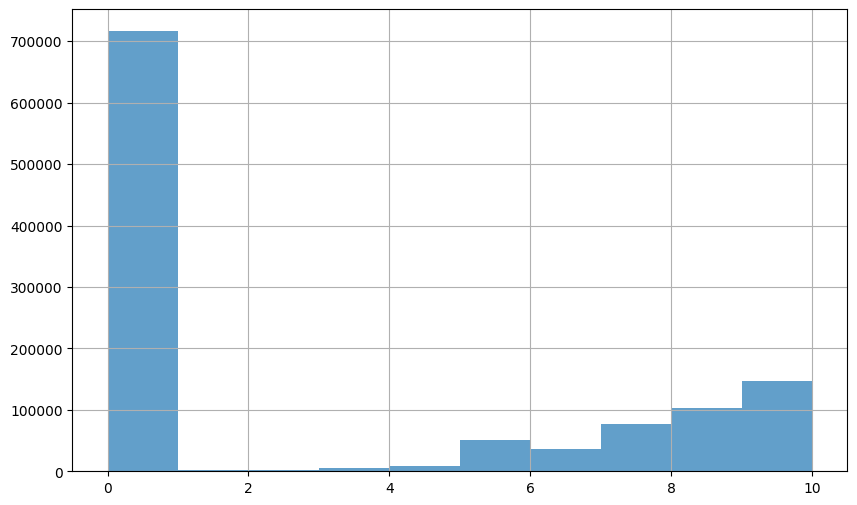

In [47]:
# Rating distribution
plt.figure(figsize=(10,6))
rating_df['Book-Rating'].hist(bins=10, alpha=0.7)

In [42]:
# Rating distribution
avg_rating = rating_df['Book-Rating'].mean()
print(f"Average rating: {avg_rating:.2f}")
print(f"Rating standard deviation: {rating_df['Book-Rating'].std():.2f}")

Average rating: 2.87
Rating standard deviation: 3.85


In [65]:
# Implicit vs explicit ratings (0 ratings analysis)
zero_ratings = (rating_df['Book-Rating'] == 0).sum()
print(f"Zero ratings (implicit feedback): {zero_ratings} ({zero_ratings/len(rating_df)*100:.1f}%)")

Zero ratings (implicit feedback): 716109 (62.3%)


### **Comment: 0 Rating can be assumed as no rating**

In [38]:
# Rating distribution
rating_dist = rating_df['Book-Rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    percentage = count / len(rating_df) * 100
    print(f"  Rating {rating}: {count} ({percentage:.1f}%)")

  Rating 0: 716109 (62.3%)
  Rating 1: 1770 (0.2%)
  Rating 2: 2759 (0.2%)
  Rating 3: 5996 (0.5%)
  Rating 4: 8904 (0.8%)
  Rating 5: 50974 (4.4%)
  Rating 6: 36924 (3.2%)
  Rating 7: 76457 (6.6%)
  Rating 8: 103736 (9.0%)
  Rating 9: 67541 (5.9%)
  Rating 10: 78610 (6.8%)


In [70]:
# User activity
filtered_ratings = rating_df[rating_df['Book-Rating'] != 0]

user_activity = filtered_ratings['User-ID'].value_counts()
print(f"Average Book ratings per user: {user_activity.mean():.1f}")
print(f"Most active user rated: {user_activity.max()} books")
print(f"Users with only 1 rating: {(user_activity == 1).sum()}")

Average Book ratings per user: 5.6
Most active user rated: 8524 books
Users with only 1 rating: 45382


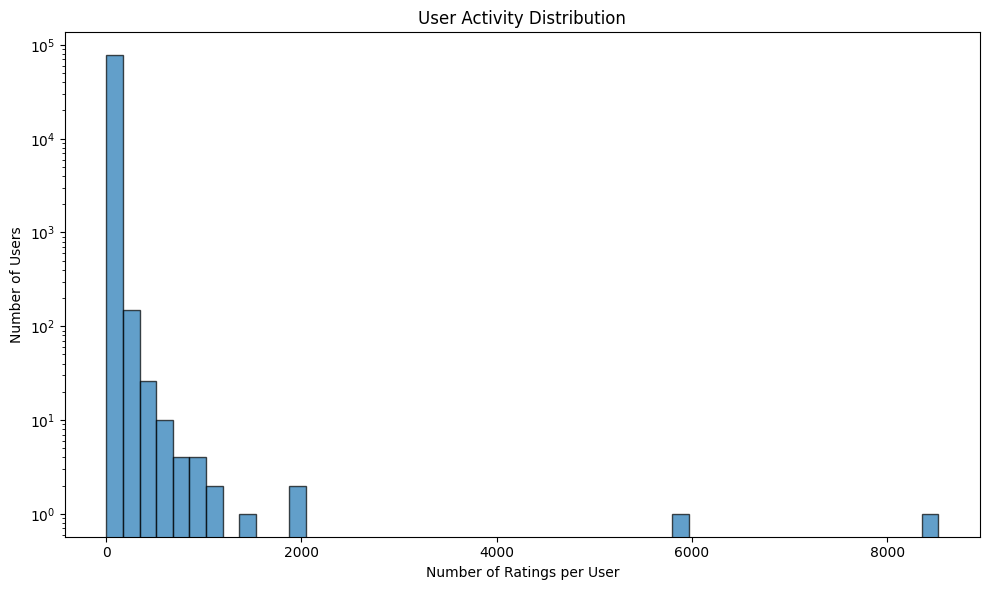

In [72]:
user_activity = filtered_ratings['User-ID'].value_counts()

plt.figure(figsize=(10,6))
plt.hist(user_activity, bins=50, alpha=0.7, edgecolor='black')
plt.title('User Activity Distribution')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.tight_layout()
plt.show()

### ** these outlier users (seemed suspicious )can be removed from the analysis **

Text(0, 0.5, 'Number of Users')

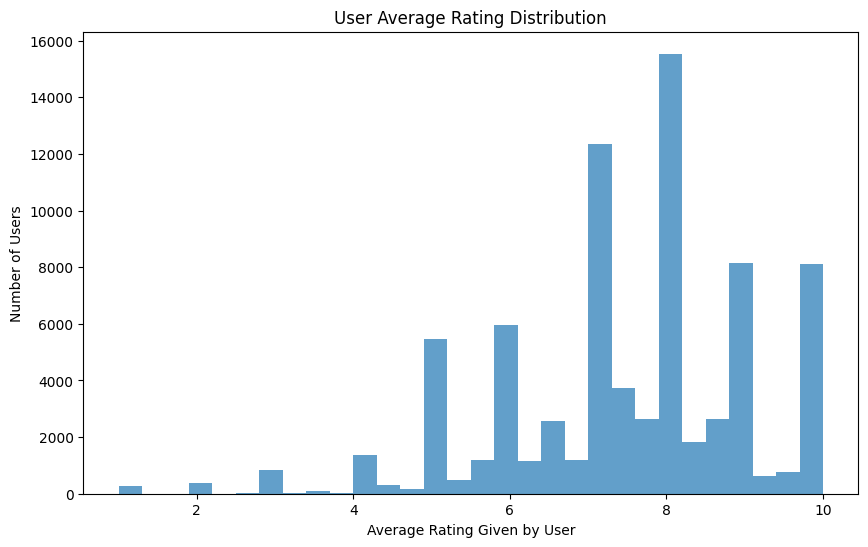

In [73]:

user_avg_ratings = filtered_ratings.groupby('User-ID')['Book-Rating'].mean()

plt.figure(figsize=(10,6))
plt.hist(user_avg_ratings, bins=30, alpha=0.7)
plt.title('User Average Rating Distribution')
plt.xlabel('Average Rating Given by User')
plt.ylabel('Number of Users')


In [74]:
# Book popularity

filtered_ratings = rating_df[rating_df['Book-Rating'] != 0]

book_popularity = filtered_ratings['ISBN'].value_counts()
print(f"Average number of ratings per book: {book_popularity.mean():.1f}")
print(f"Most rated book has: {book_popularity.max()} ratings")
print(f"Books with only 1 rating: {(book_popularity == 1).sum()}")

Average number of ratings per book: 2.3
Most rated book has: 707 ratings
Books with only 1 rating: 129621


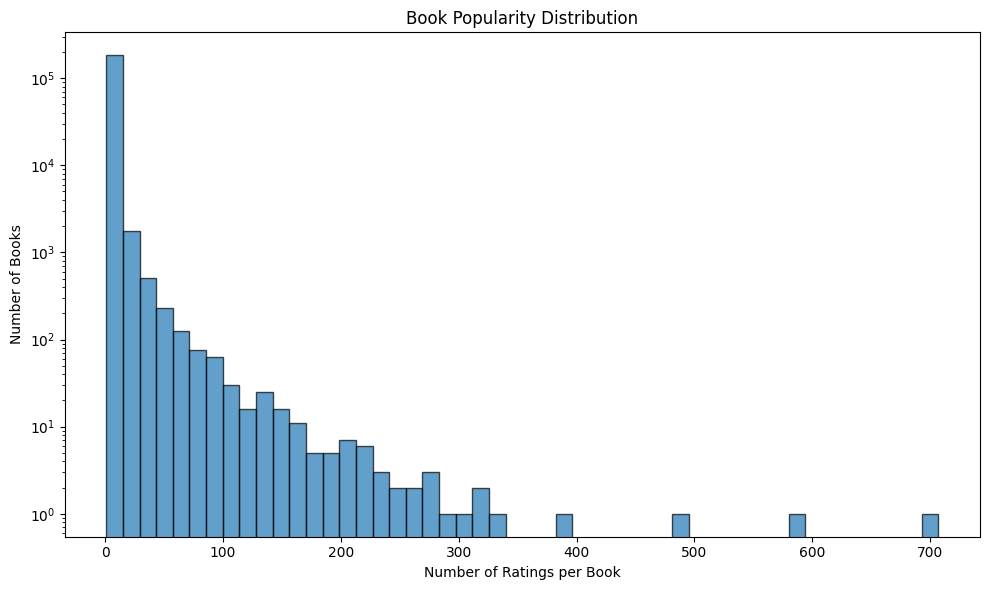

In [75]:
# Book popularity
book_popularity = filtered_ratings['ISBN'].value_counts()
plt.figure(figsize=(10,6))
plt.hist(book_popularity, bins=50, alpha=0.7, edgecolor='black')
plt.title('Book Popularity Distribution')
plt.xlabel('Number of Ratings per Book')
plt.ylabel('Number of Books')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [78]:
top_books = book_popularity.head(10).reset_index()
top_books.columns = ['ISBN', 'Rating Count']
top_books = top_books.merge(books_df, on='ISBN', how='inner')
display(top_books[['Book-Title', 'Book-Author', 'Rating Count']])

,Book-Title,Book-Author,Rating Count
0,The Lovely Bones: A Novel,Alice Sebold,707
1,Wild Animus,Rich Shapero,581
2,The Da Vinci Code,Dan Brown,487
3,The Red Tent (Bestselling Backlist),Anita Diamant,383
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,320
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,313
6,The Secret Life of Bees,Sue Monk Kidd,307
7,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,295
8,A Painted House,John Grisham,281


Text(0, 0.5, 'Number of Books')

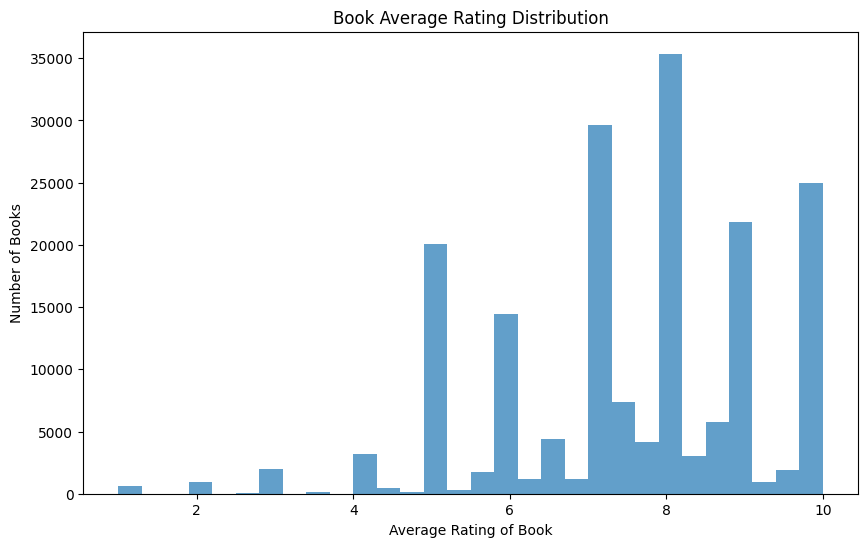

In [79]:
# Book average ratings

filtered_ratings = rating_df[rating_df['Book-Rating'] != 0]
book_avg_ratings = filtered_ratings.groupby('ISBN')['Book-Rating'].mean()

plt.figure(figsize=(10,6))
plt.hist(book_avg_ratings, bins=30, alpha=0.7)
plt.title('Book Average Rating Distribution')
plt.xlabel('Average Rating of Book')
plt.ylabel('Number of Books')


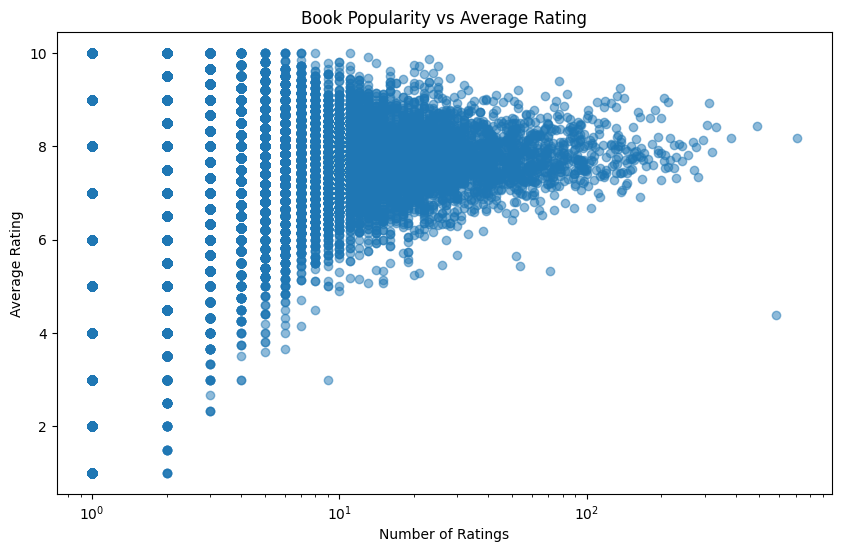

In [84]:
# Rating count vs average rating

book_stats = filtered_ratings.groupby('ISBN')['Book-Rating'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(book_stats['count'], book_stats['mean'], alpha=0.5)
plt.title('Book Popularity vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xscale('log')

### **EDA of Users.csv**

In [85]:
# Basic statistics
print(f"Total users: {len(users_df)}")
print(f"Users with age information: {users_df['Age'].notna().sum()}")
print(f"Users with location information: {users_df['Location'].notna().sum()}")


Total users: 278858
Users with age information: 168096
Users with location information: 278858


In [86]:
# Age distribution
valid_ages = users_df['Age'].dropna()
if len(valid_ages) > 0:
    print(f"\nAge Statistics:")
    print(f"Average age: {valid_ages.mean():.1f}")
    print(f"Median age: {valid_ages.median():.1f}")
    print(f"Age range: {valid_ages.min():.0f} - {valid_ages.max():.0f}")
        
    # Age groups
    age_groups = pd.cut(valid_ages, bins=[0, 18, 25, 35, 50, 65, 100], 
                          labels=['<18', '18-24', '25-34', '35-49', '50-64', '65+'])
    print(f"\nAge Group Distribution:")
    for group, count in age_groups.value_counts().items():
        print(f"  {group}: {count} users")



Age Statistics:
Average age: 34.8
Median age: 32.0
Age range: 0 - 244

Age Group Distribution:
  25-34: 49343 users
  35-49: 43156 users
  18-24: 33919 users
  50-64: 21578 users
  <18: 15597 users
  65+: 3721 users


Text(0, 0.5, 'Number of Users')

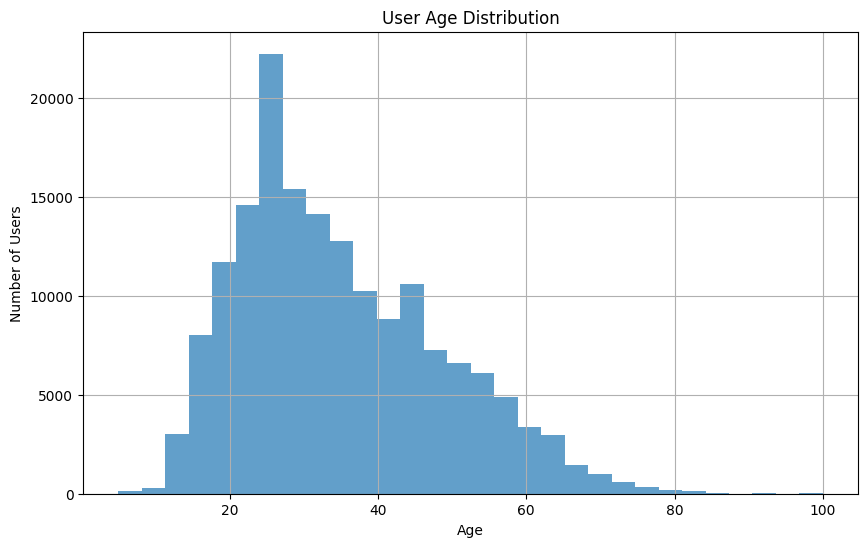

In [89]:

valid_ages = users_df['Age'].dropna()
valid_ages = valid_ages[(valid_ages >= 5) & (valid_ages <= 100)]

plt.figure(figsize=(10,6))
valid_ages.hist(bins=30, alpha=0.7)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')

### ** Comment: some extreme cases are there but since this variable will not currently planned to be used in the model, so I will leave it as is**

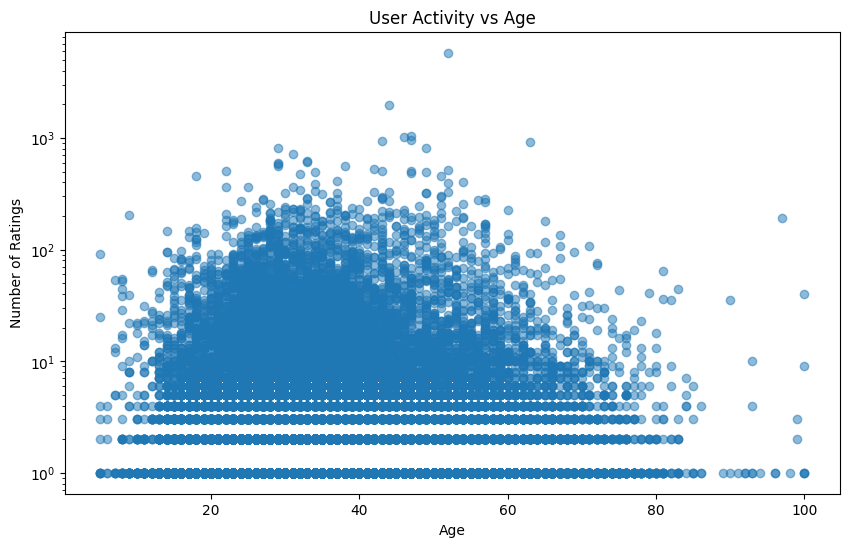

In [95]:
# User activity by age

filtered_ratings = rating_df[rating_df['Book-Rating'] != 0]

user_ratings_count = filtered_ratings['User-ID'].value_counts().reset_index()
user_ratings_count.columns = ['User-ID', 'Rating-Count']

user_age_activity = users_df.merge(user_ratings_count, on='User-ID', how='inner')
user_age_activity = user_age_activity.dropna(subset=['Age'])
user_age_activity = user_age_activity[(user_age_activity['Age'] >= 5) & (user_age_activity['Age'] <= 100)]

plt.figure(figsize=(10,6))
plt.scatter(user_age_activity['Age'], user_age_activity['Rating-Count'], alpha=0.5)
plt.title('User Activity vs Age')
plt.xlabel('Age')
plt.ylabel('Number of Ratings')
plt.yscale('log')

In [96]:
from collections import Counter
# Location check
locations = users_df['Location'].dropna()
if len(locations) > 0:
    print(f"\nLocation Analysis:")        
    countries = []
    for loc in locations:
        parts = str(loc).split(',')
        if len(parts) >= 3:
            countries.append(parts[-1].strip().lower())
        elif len(parts) == 2:
            countries.append(parts[-1].strip().lower())
        
    if countries:
        country_counts = Counter(countries)
        print(f"Top 10 Countries:")
        for country, count in country_counts.most_common(10):
            print(f"  {country.title()}: {count} users")


Location Analysis:
Top 10 Countries:
  Usa: 139711 users
  Canada: 21658 users
  United Kingdom: 18538 users
  Germany: 17043 users
  Spain: 13147 users
  Australia: 11784 users
  Italy: 11266 users
  : 4578 users
  France: 3455 users
  Portugal: 3325 users


### **Data look clean at country level but city is a bit messy. May need to deep dive to make it workable but given the time constraint I will skip it **

In [64]:
# Check ISBN consistency
books_isbns = set(books_df['ISBN'].unique())
ratings_isbns = set(rating_df['ISBN'].unique())
users_in_ratings = set(rating_df['User-ID'].unique())
users_in_users_df = set(users_df['User-ID'].unique())
    
print(f"ISBNs in books but not in ratings: {len(books_isbns - ratings_isbns)}")
print(f"ISBNs in ratings but not in books: {len(ratings_isbns - books_isbns)}")
print(f"Users in ratings but not in users table: {len(users_in_ratings - users_in_users_df)}")
print(f"Users in users table but not in ratings: {len(users_in_users_df - users_in_ratings)}")


ISBNs in books but not in ratings: 1209
ISBNs in ratings but not in books: 70412
Users in ratings but not in users table: 0
Users in users table but not in ratings: 173575


### ** Comment: for the model data, I need to do inner join to ensure we are keeping those books and users which are present in all the 3 CSVs**

In [100]:
# Rating sparsity
total_possible_ratings = len(users_df) * len(books_df)

filtered_ratings = rating_df[rating_df['Book-Rating'] != 0]

actual_ratings = len(filtered_ratings)
sparsity = (1 - actual_ratings / total_possible_ratings) * 100
print(f"\nRating Matrix Sparsity: {sparsity:.4f}%")
print(f"Actual ratings: {actual_ratings:,}")
print(f"Possible ratings: {total_possible_ratings:,}")


Rating Matrix Sparsity: 99.9994%
Actual ratings: 433,671
Possible ratings: 75,668,954,874


### **Comment: As expected, there is extreme sparsity in the data**